In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import phik

In [2]:
df1=pd.read_csv('Camden_accidents/Camden_accidents.csv')
df1=df1.set_index('Datetime')
df1.index=pd.to_datetime(df1.index)

In [3]:
df1.shape

(46536, 24)

In [4]:
df1.isnull().sum()

Number                           0
Municipality                     0
Date                             0
Day of Week                      0
Killed                           0
Injured                          0
P Killed                         0
P injured                        0
Severity                         0
Intersection                     0
Alcohol                          0
Crash Type                      17
Total Vehicles                   0
Location                         0
Route                         9445
Road Horizontal Alignment      191
Road Grade                     252
Road Surface Type              134
Surface Condition              182
Light Condition                129
Environment Condition          189
Road Divided By               1259
Posted Speed                  1105
Other Property Damage        41918
dtype: int64

In [5]:
df1.head()

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:05:00,201704122017-000003,Collingswood Boro,2017-01-01,SU,0.0,1.0,0.0,0.0,I,I,...,130.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,40.0,FRONT DOOR AND SEVERAL BRICKS AROUND THE DOOR ...
2017-01-01 01:19:00,2017040917-000034,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,1.0,I,B,...,NaN,1.0,4.0,2.0,1.0,6.0,3.0,4.0,25.0,NaN
2017-01-01 01:45:00,20170436A160-2017-00002A,Winslow Twp,2017-01-01,SU,0.0,0.0,0.0,0.0,P,B,...,446.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,65.0,NaN
2017-01-01 02:08:00,201704152017-000019,Gloucester Twp,2017-01-01,SU,0.0,0.0,0.0,0.0,P,I,...,168.0,1.0,4.0,2.0,1.0,6.0,1.0,4.0,25.0,NaN
2017-01-01 07:33:00,2017040917-000064,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,561.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,45.0,NaN


In [6]:
df_day = df1.Number.groupby(pd.Grouper(freq="1D")).count()

In [7]:
np.mean(df_day)

42.4986301369863

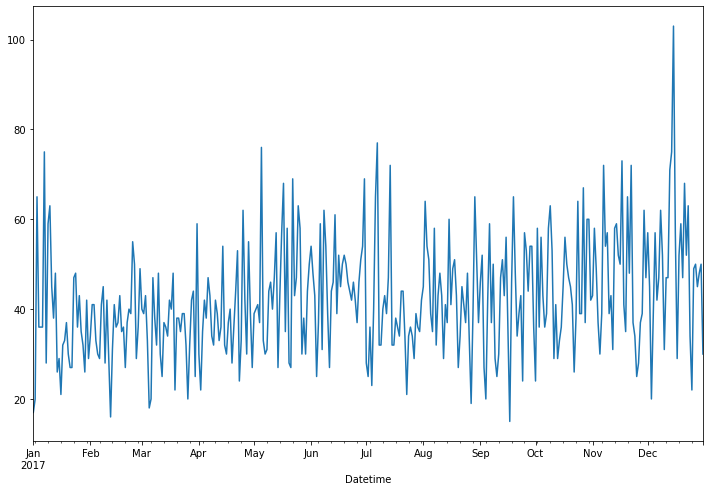

In [8]:
df_day.loc['2017-01-01':'2017-12-31'].plot(figsize=(12,8));

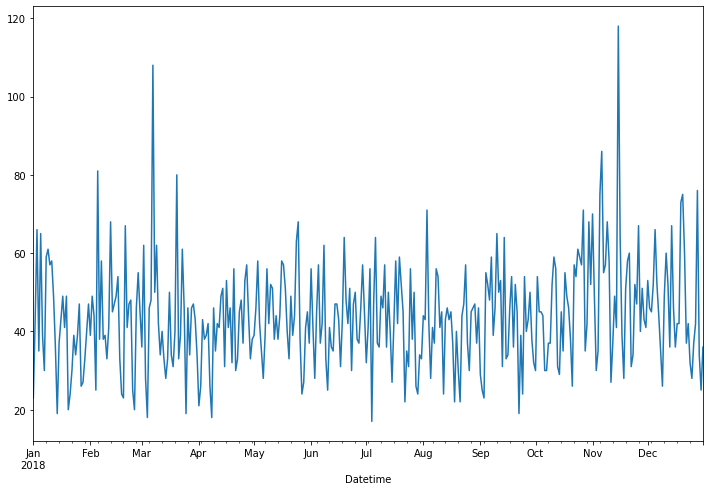

In [9]:
df_day.loc['2018-01-01':'2018-12-31'].plot(figsize=(12,8));

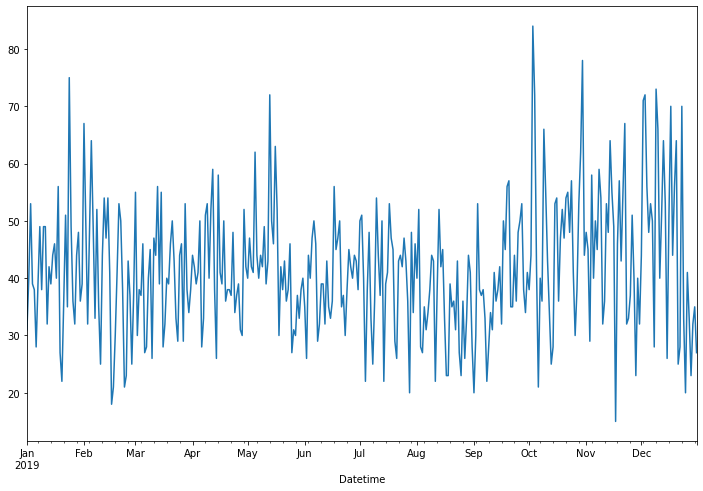

In [10]:
df_day.loc['2019-01-01':'2019-12-31'].plot(figsize=(12,8));

In [11]:
df_day[df_day>100]

Datetime
2017-12-15    103
2018-03-07    108
2018-11-15    118
Name: Number, dtype: int64

In [12]:
df_dayhigh=df1[df1.Date.isin(['2017-12-15', '2018-03-07', '2018-11-15'])]

In [13]:
# 3 means snow , 2 means rain, 6 is freezing rain and 7 is blowing snow. 
# All 3 highest accident days have snow or freezing rain conditions
df_dayhigh['Environment Condition'].value_counts()

3.0     259
1.0      34
2.0      11
5.0       9
8.0       7
7.0       4
6.0       3
0.0       1
99.0      1
Name: Environment Condition, dtype: int64

In [14]:
df_day[(df_day<100) & (df_day>80)]

Datetime
2018-02-05    81
2018-11-06    86
2019-10-03    84
Name: Number, dtype: int64

In [15]:
# Holidays have lowest accident numbers
df_day[df_day<21]

Datetime
2017-01-01    17
2017-01-02    20
2017-02-12    16
2017-03-05    18
2017-03-06    20
2017-03-26    20
2017-08-27    19
2017-09-04    20
2017-09-17    15
2017-12-03    20
2018-01-14    19
2018-01-20    20
2018-02-25    20
2018-03-04    18
2018-03-25    19
2018-04-08    18
2018-07-04    17
2018-09-22    19
2019-02-16    18
2019-07-28    20
2019-09-01    20
2019-11-17    15
2019-12-25    20
Name: Number, dtype: int64

In [16]:
holidays=['2017-01-02', '2017-01-16', '2017-05-29', '2017-07-04' , '2017-09-04',
         '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15','2018-05-28', '2018-07-04',
          '2018-09-03', '2018-11-22','2018-12-25', '2018-12-24', '2019-01-01', '2019-01-21',
          '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28','2019-12-25']


In [17]:
df1['Day of Week'].loc[df1.Date.isin(holidays)]='HO'

C:\Users\nshan\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df_month = df1.Number.groupby(pd.Grouper(freq="1M")).count()

In [19]:
df_month.index=pd.DatetimeIndex(df_month.index).to_period('M')

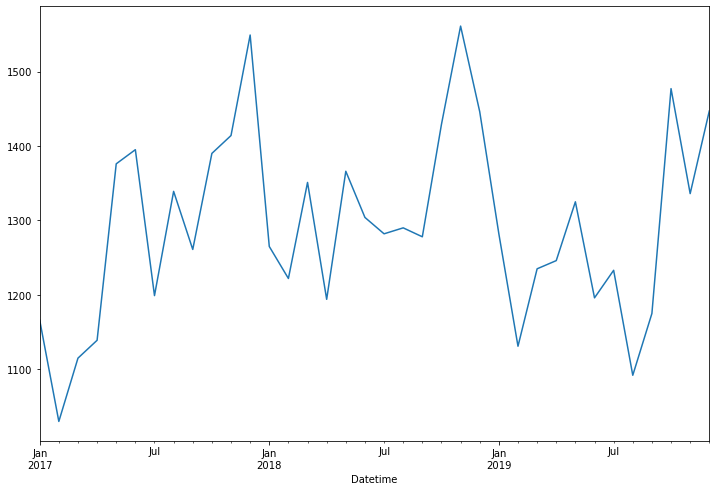

In [20]:
df_month.plot(figsize=(12,8));

[]

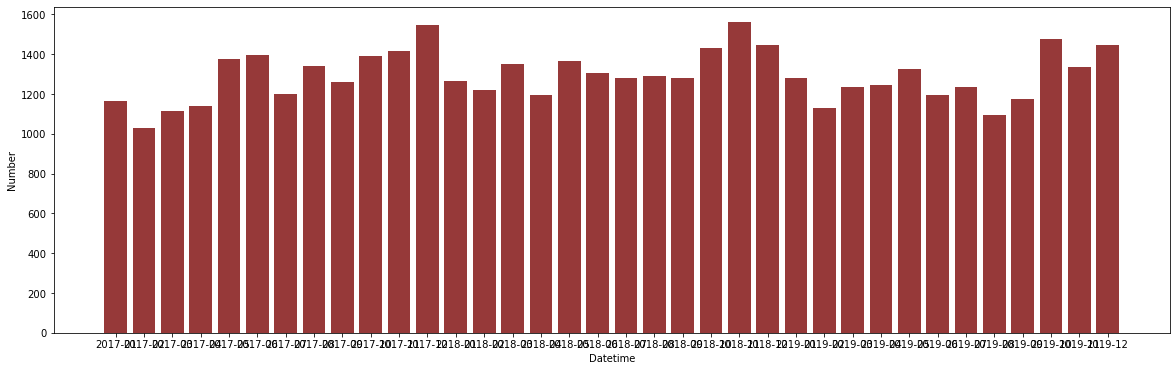

In [21]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(ax=ax, x=df_month.index,y=df_month, color='brown')
ax.plot()

In [22]:
# December has the highest accidents record
df_month[df_month>1400]

Datetime
2017-11    1414
2017-12    1549
2018-10    1429
2018-11    1561
2018-12    1446
2019-10    1477
2019-12    1447
Freq: M, Name: Number, dtype: int64

In [23]:
df_month[df_month<1100]

Datetime
2017-02    1030
2019-08    1092
Freq: M, Name: Number, dtype: int64

In [24]:
df_hour = df1.Number.groupby(df1.index.hour).count()

In [25]:
df_hour

Datetime
0      519
1      505
2      433
3      413
4      330
5      510
6     1236
7     2619
8     2766
9     2100
10    1973
11    2259
12    2831
13    2916
14    3138
15    3832
16    4043
17    4217
18    3024
19    1970
20    1631
21    1264
22    1137
23     870
Name: Number, dtype: int64

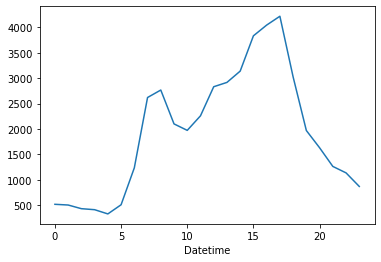

In [26]:
df_hour.plot()

Text(0.5, 1.0, 'Total Accidents in Each Hour During 2017-2019')

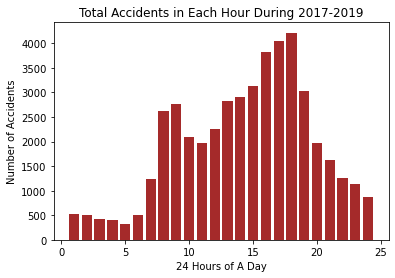

In [27]:
# The hour of 18:00-19:00 has the highest accident rate

plt.bar(df_hour.index+1, df_hour, color='brown')
plt.xlabel("24 Hours of A Day")
plt.ylabel("Number of Accidents")
plt.title("Total Accidents in Each Hour During 2017-2019")

In [28]:
# Friday has the highest accident rate, Sunday is the lowest. 
df1['Day of Week'].value_counts()

FR    7823
TU    7224
TH    7040
WE    7017
MO    6299
SA    5815
SU    4735
HO     583
Name: Day of Week, dtype: int64

In [29]:
df_hour_weekday = df1['Day of Week'].groupby(df1.index.hour).value_counts()

In [30]:
df_hour_weekday

Datetime  Day of Week
0         SU             122
          SA             101
          TH              69
          FR              61
          TU              58
                        ... 
23        TH             106
          TU             100
          WE              86
          MO              73
          HO              14
Name: Day of Week, Length: 192, dtype: int64

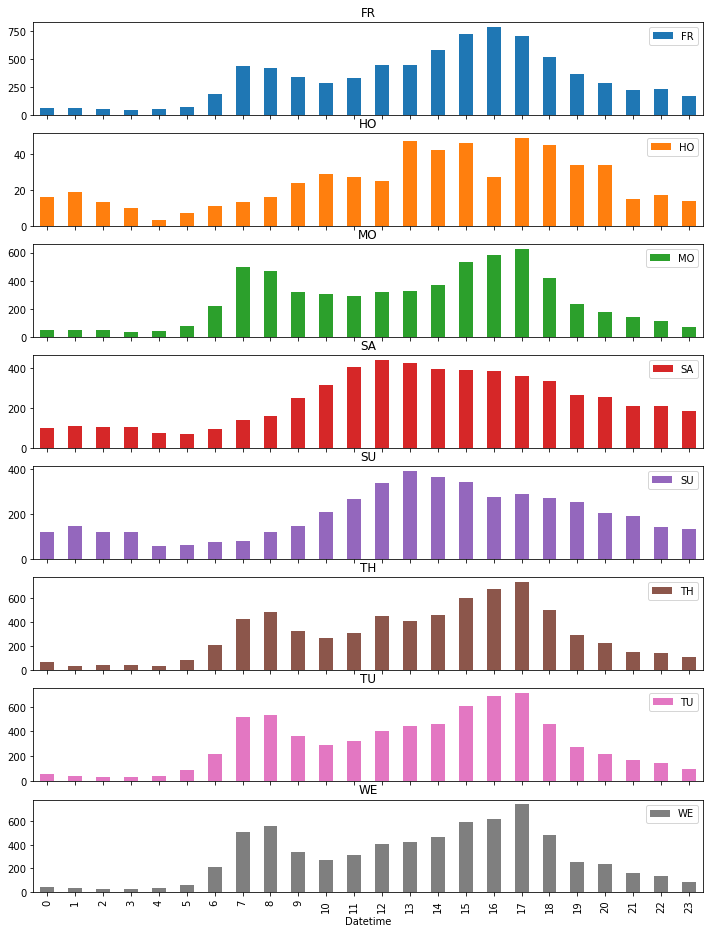

In [31]:
# Friday accident peak time is between 16:00 -17:00
# Other weekdays accident peak time is 17:00-18:00
# All the weekdays have double peak, the first peak(minor)is 7:00-8:00 (Monday and Friday) or (8:00-9:00)(Other Weekdays)
# Saturday and Sunday have a single peak, Saturday (12:00-13:00)and Sunday (13:00-14:00)
# Holiday is similar to Weekends

df_hour_weekday.unstack(level=1).plot(kind='bar', subplots=True, figsize=(12,16));

In [32]:
df1_sholiday=df1[df1.Date.isin(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31','2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31', '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31' ])]
df1_sholiday

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-26 04:41:00,2017040917-106635,Cherry Hill Twp,2017-12-26,TU,0.0,0.0,0.0,0.0,P,B,...,70.0,3.0,4.0,2.0,1.0,6.0,1.0,3.0,45.0,SEE NARRATIVE ...
2017-12-26 06:30:00,20170404A310-2017-03137A,Bellmawr Boro,2017-12-26,TU,0.0,0.0,0.0,0.0,P,B,...,295.0,3.0,4.0,2.0,1.0,2.0,1.0,2.0,35.0,NaN
2017-12-26 06:54:00,2017040917-106648,Cherry Hill Twp,2017-12-26,TU,0.0,1.0,0.0,0.0,I,B,...,644.0,1.0,4.0,2.0,1.0,1.0,1.0,2.0,45.0,SEE SUPPLEMENT ...
2017-12-26 06:57:00,20170404A310-2017-03156A,Bellmawr Boro,2017-12-26,TU,0.0,0.0,0.0,0.0,P,B,...,295.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,65.0,NaN
2017-12-26 07:08:00,2017040917-106651,Cherry Hill Twp,2017-12-26,TU,0.0,0.0,0.0,0.0,P,I,...,644.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:37:00,2019043115108-19,Somerdale Boro,2019-12-31,TU,0.0,0.0,0.0,0.0,P,I,...,30.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,40.0,NaN
2019-12-31 18:37:00,2019040919-093044,Cherry Hill Twp,2019-12-31,TU,0.0,0.0,0.0,0.0,P,B,...,616.0,1.0,4.0,2.0,1.0,7.0,1.0,5.0,35.0,NaN
2019-12-31 18:51:00,2019040919-093049,Cherry Hill Twp,2019-12-31,TU,0.0,0.0,0.0,0.0,P,B,...,544.0,1.0,4.0,2.0,1.0,7.0,1.0,5.0,40.0,NaN


In [33]:
df1_sholiday = df1_sholiday.Number.groupby(df1_sholiday.index.hour).count()

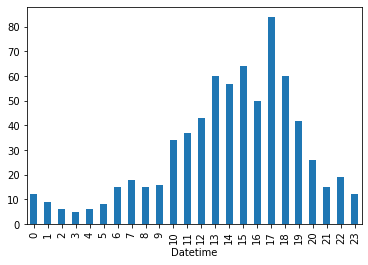

In [34]:
df1_sholiday.plot.bar()

In [35]:
df1.Municipality.value_counts()

Cherry Hill Twp             8738
Gloucester Twp              5467
Camden City                 5157
Pennsauken Twp              4163
Winslow Twp                 3267
Bellmawr Boro               2861
Gloucester City             2592
Voorhees Twp                2211
Lindenwold Boro             1159
Haddon Twp                  1104
Magnolia Boro                786
Runnemede Boro               765
Haddon Heights Boro          754
Berlin Boro                  723
Somerdale Boro               689
Clementon Boro               660
Barrington Boro              632
Collingswood Boro            620
Pine Hill Boro               524
Mount Ephriam Boro           511
Waterford Twp                495
Haddonfield Boro             424
Lawnside Boro                422
Stratford Boro               408
Berlin Twp                   371
Gibbsboro Boro               300
Brooklawn Boro               259
Merchantville Boro           207
Laurel Springs Boro          127
Chesilhurst Boro              35
Audubon Pa

In [36]:
df1[df1.Injured>0]

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:05:00,201704122017-000003,Collingswood Boro,2017-01-01,SU,0.0,1.0,0.0,0.0,I,I,...,130.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,40.0,FRONT DOOR AND SEVERAL BRICKS AROUND THE DOOR ...
2017-01-01 01:19:00,2017040917-000034,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,1.0,I,B,...,NaN,1.0,4.0,2.0,1.0,6.0,3.0,4.0,25.0,NaN
2017-01-01 07:33:00,2017040917-000064,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,561.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,45.0,NaN
2017-01-01 12:45:00,2017040917-000118,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,38.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,50.0,NaN
2017-01-01 16:59:00,20170435170000017,Waterford Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,30.0,1.0,4.0,2.0,1.0,3.0,1.0,5.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 17:04:00,201904222019-22464,Lindenwold Boro,2019-12-30,MO,0.0,1.0,0.0,0.0,I,I,...,673.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2019-12-30 17:13:00,20190427190070886,Pennsauken Twp,2019-12-30,MO,0.0,6.0,0.0,0.0,I,B,...,130.0,1.0,4.0,2.0,2.0,6.0,5.0,1.0,45.0,NaN
2019-12-30 17:53:00,201904322019-04654,Stratford Boro,2019-12-30,MO,0.0,2.0,0.0,0.0,I,B,...,702.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN


In [37]:
df1[df1.Severity=='I']

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:05:00,201704122017-000003,Collingswood Boro,2017-01-01,SU,0.0,1.0,0.0,0.0,I,I,...,130.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,40.0,FRONT DOOR AND SEVERAL BRICKS AROUND THE DOOR ...
2017-01-01 01:19:00,2017040917-000034,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,1.0,I,B,...,NaN,1.0,4.0,2.0,1.0,6.0,3.0,4.0,25.0,NaN
2017-01-01 07:33:00,2017040917-000064,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,561.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,45.0,NaN
2017-01-01 12:45:00,2017040917-000118,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,38.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,50.0,NaN
2017-01-01 16:59:00,20170435170000017,Waterford Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,30.0,1.0,4.0,2.0,1.0,3.0,1.0,5.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 17:04:00,201904222019-22464,Lindenwold Boro,2019-12-30,MO,0.0,1.0,0.0,0.0,I,I,...,673.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2019-12-30 17:13:00,20190427190070886,Pennsauken Twp,2019-12-30,MO,0.0,6.0,0.0,0.0,I,B,...,130.0,1.0,4.0,2.0,2.0,6.0,5.0,1.0,45.0,NaN
2019-12-30 17:53:00,201904322019-04654,Stratford Boro,2019-12-30,MO,0.0,2.0,0.0,0.0,I,B,...,702.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN


In [38]:
df1[(df1.Severity=='F')]

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-13 17:43:00,2017041617-020-A,Haddon Twp,2017-01-13,FR,1.0,0.0,1.0,0.0,F,I,...,642.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2017-01-14 19:38:00,2017043100617-17,Somerdale Boro,2017-01-14,SA,1.0,0.0,1.0,0.0,F,I,...,30.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,40.0,NaN
2017-01-18 07:59:00,2017040917-005055,Cherry Hill Twp,2017-01-18,WE,1.0,1.0,0.0,0.0,F,I,...,154.0,1.0,5.0,2.0,2.0,1.0,5.0,5.0,40.0,NaN
2017-01-22 10:24:00,2017043417-62-AC,Voorhees Twp,2017-01-22,SU,1.0,0.0,0.0,0.0,F,B,...,685.0,2.0,4.0,2.0,2.0,1.0,5.0,5.0,45.0,TREES-CAMDEN COUNTY-2311 EGG HARBOR RD LINDENW...
2017-02-02 20:27:00,20170436170004816,Winslow Twp,2017-02-02,TH,1.0,1.0,0.0,0.0,F,B,...,689.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25 19:22:00,201904152019-48378,Gloucester Twp,2019-10-25,FR,1.0,0.0,1.0,0.0,F,B,...,673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN
2019-11-11 07:23:00,201904172019-13534,Haddonfield Boro,2019-11-11,MO,1.0,0.0,1.0,0.0,F,B,...,NaN,1.0,4.0,2.0,1.0,1.0,1.0,5.0,25.0,NaN
2019-11-25 15:48:00,2019040919-085345,Cherry Hill Twp,2019-11-25,MO,1.0,1.0,0.0,0.0,F,I,...,673.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,40.0,NaN


In [39]:
df1[(df1.Killed>0)]

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-13 17:43:00,2017041617-020-A,Haddon Twp,2017-01-13,FR,1.0,0.0,1.0,0.0,F,I,...,642.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2017-01-14 19:38:00,2017043100617-17,Somerdale Boro,2017-01-14,SA,1.0,0.0,1.0,0.0,F,I,...,30.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,40.0,NaN
2017-01-18 07:59:00,2017040917-005055,Cherry Hill Twp,2017-01-18,WE,1.0,1.0,0.0,0.0,F,I,...,154.0,1.0,5.0,2.0,2.0,1.0,5.0,5.0,40.0,NaN
2017-01-22 10:24:00,2017043417-62-AC,Voorhees Twp,2017-01-22,SU,1.0,0.0,0.0,0.0,F,B,...,685.0,2.0,4.0,2.0,2.0,1.0,5.0,5.0,45.0,TREES-CAMDEN COUNTY-2311 EGG HARBOR RD LINDENW...
2017-02-02 20:27:00,20170436170004816,Winslow Twp,2017-02-02,TH,1.0,1.0,0.0,0.0,F,B,...,689.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25 19:22:00,201904152019-48378,Gloucester Twp,2019-10-25,FR,1.0,0.0,1.0,0.0,F,B,...,673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN
2019-11-11 07:23:00,201904172019-13534,Haddonfield Boro,2019-11-11,MO,1.0,0.0,1.0,0.0,F,B,...,NaN,1.0,4.0,2.0,1.0,1.0,1.0,5.0,25.0,NaN
2019-11-25 15:48:00,2019040919-085345,Cherry Hill Twp,2019-11-25,MO,1.0,1.0,0.0,0.0,F,I,...,673.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,40.0,NaN


In [40]:
df1.Injured.value_counts()

0.0     34635
1.0      8548
2.0      2429
3.0       629
4.0       183
5.0        70
6.0        31
7.0         7
8.0         2
9.0         1
21.0        1
Name: Injured, dtype: int64

In [41]:
df1.Injured.count()

46536

In [42]:
df1.Severity.count()

46536

In [43]:
df1.Severity.value_counts()

P    34543
I    11853
F      140
Name: Severity, dtype: int64

In [44]:
# 25.8% of the accidents caused injury or death
df1.Severity[df1.Severity!='P'].count()/df1.Severity.count()

0.2577144576242049

In [45]:
# If the severity is written as 'F', the injury can be 0,1, or other number. There is no mistake in it.
# Severity is not 'P' can inculde all the accidents causing death and injury

df1[(df1.Injured==0)&(df1.Severity!='P')]

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-13 17:43:00,2017041617-020-A,Haddon Twp,2017-01-13,FR,1.0,0.0,1.0,0.0,F,I,...,642.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2017-01-14 19:38:00,2017043100617-17,Somerdale Boro,2017-01-14,SA,1.0,0.0,1.0,0.0,F,I,...,30.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,40.0,NaN
2017-01-22 10:24:00,2017043417-62-AC,Voorhees Twp,2017-01-22,SU,1.0,0.0,0.0,0.0,F,B,...,685.0,2.0,4.0,2.0,2.0,1.0,5.0,5.0,45.0,TREES-CAMDEN COUNTY-2311 EGG HARBOR RD LINDENW...
2017-02-04 02:34:00,20170408A310-2017-00268A,Camden City,2017-02-04,SA,1.0,0.0,0.0,0.0,F,B,...,676.0,3.0,6.0,2.0,1.0,7.0,1.0,5.0,55.0,GUARDRAIL - NJDOT ...
2017-02-07 18:10:00,2017042717-11093,Pennsauken Twp,2017-02-07,TU,1.0,0.0,1.0,0.0,F,I,...,38.0,1.0,4.0,2.0,1.0,7.0,1.0,3.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-21 21:45:00,201904081910210648,Camden City,2019-10-21,MO,1.0,0.0,1.0,0.0,F,B,...,168.0,1.0,4.0,2.0,1.0,4.0,1.0,5.0,25.0,NaN
2019-10-25 04:45:00,2019040919-077570,Cherry Hill Twp,2019-10-25,FR,1.0,0.0,1.0,0.0,F,B,...,38.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,50.0,NaN
2019-10-25 19:22:00,201904152019-48378,Gloucester Twp,2019-10-25,FR,1.0,0.0,1.0,0.0,F,B,...,673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN


In [46]:
df1.Killed.sum()

149.0

In [47]:
df1.Killed.groupby(pd.Grouper(freq="1Y")).sum()

Datetime
2017-12-31    49.0
2018-12-31    50.0
2019-12-31    50.0
Freq: A-DEC, Name: Killed, dtype: float64

In [48]:
df1.Number[df1.Killed>0].groupby(pd.Grouper(freq="1Y")).count()

Datetime
2017-12-31    45
2018-12-31    46
2019-12-31    49
Freq: A-DEC, Name: Number, dtype: int64

In [49]:
df_injury_m=df1.Number[df1.Severity!='P'].groupby(pd.Grouper(freq="1M")).count()

In [50]:
df_injury_m.index=pd.DatetimeIndex(df_injury_m.index).to_period('M')

[]

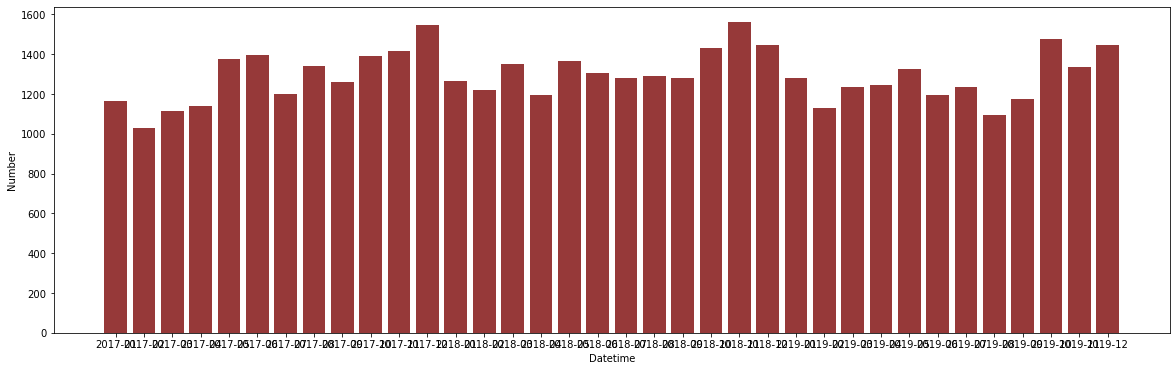

In [51]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(ax=ax, x=df_month.index,y=df_month, color='brown')
ax.plot()

In [52]:
df_injury=df1[df1.Severity!='P']
df_injury_h= df_injury.Number.groupby(df_injury.index.hour).count()

In [53]:
df_injury_h.head()

Datetime
0    135
1    148
2    109
3    114
4     84
Name: Number, dtype: int64

Text(0.5, 1.0, 'Total Severe Accidents in Each Hour During 2017-2019')

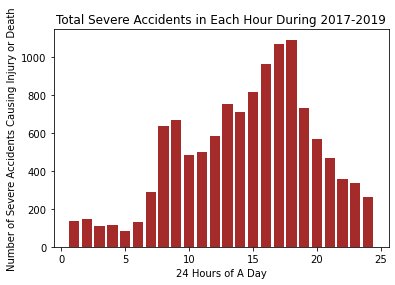

In [54]:
plt.bar(df_injury_h.index+1, df_injury_h, color='brown')
plt.xlabel("24 Hours of A Day")
plt.ylabel("Number of Severe Accidents Causing Injury or Death")
plt.title("Total Severe Accidents in Each Hour During 2017-2019")

In [55]:
df_injury['Day of Week'].value_counts()

FR    1987
TU    1898
TH    1814
WE    1779
MO    1593
SA    1474
SU    1285
HO     163
Name: Day of Week, dtype: int64

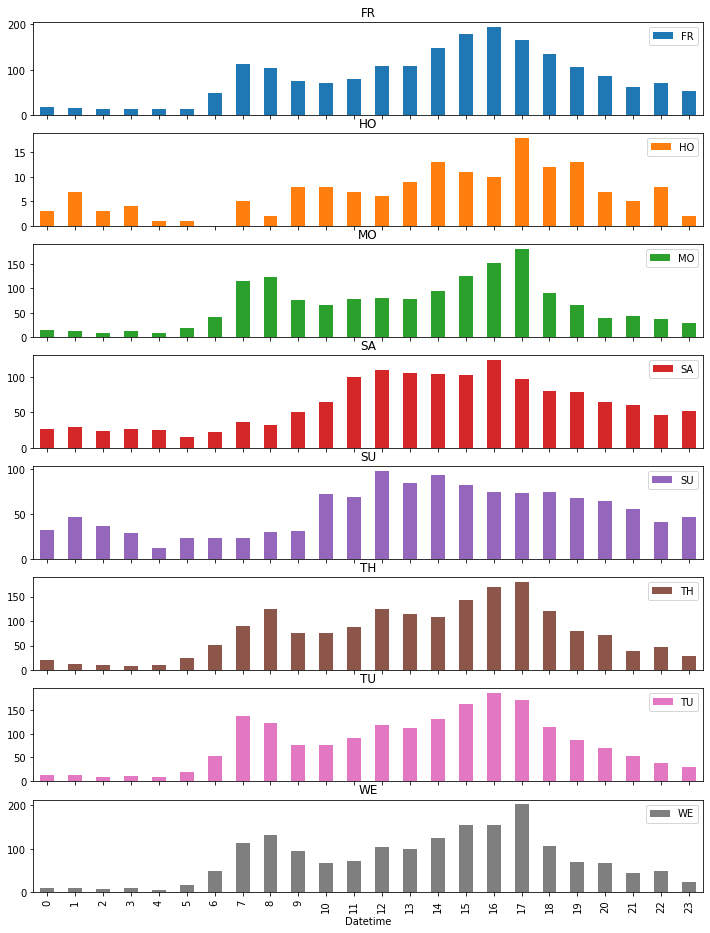

In [56]:
# Similar to the total accidents
df_injury_w = df_injury['Day of Week'].groupby(df_injury.index.hour).value_counts()
df_injury_w.unstack(level=1).plot(kind='bar', subplots=True, figsize=(12,16));

In [57]:
df_injury.head()

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:05:00,201704122017-000003,Collingswood Boro,2017-01-01,SU,0.0,1.0,0.0,0.0,I,I,...,130.0,1.0,4.0,2.0,1.0,7.0,1.0,1.0,40.0,FRONT DOOR AND SEVERAL BRICKS AROUND THE DOOR ...
2017-01-01 01:19:00,2017040917-000034,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,1.0,I,B,...,NaN,1.0,4.0,2.0,1.0,6.0,3.0,4.0,25.0,NaN
2017-01-01 07:33:00,2017040917-000064,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,561.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,45.0,NaN
2017-01-01 12:45:00,2017040917-000118,Cherry Hill Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,38.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,50.0,NaN
2017-01-01 16:59:00,20170435170000017,Waterford Twp,2017-01-01,SU,0.0,1.0,0.0,0.0,I,B,...,30.0,1.0,4.0,2.0,1.0,3.0,1.0,5.0,50.0,NaN


In [58]:
df_injury_sholiday=df_injury[df_injury['Date'].isin(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31','2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31', '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31' ])]
df_injury_sholiday

,Number,Municipality,Date,Day of Week,Killed,Injured,P Killed,P injured,Severity,Intersection,...,Route,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Other Property Damage
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-26 06:54:00,2017040917-106648,Cherry Hill Twp,2017-12-26,TU,0.0,1.0,0.0,0.0,I,B,...,644.0,1.0,4.0,2.0,1.0,1.0,1.0,2.0,45.0,SEE SUPPLEMENT ...
2017-12-26 08:41:00,20170427170104273,Pennsauken Twp,2017-12-26,TU,0.0,2.0,0.0,0.0,I,I,...,610.0,1.0,4.0,2.0,1.0,1.0,1.0,4.0,25.0,6324 WESTFIELD AVE. ...
2017-12-26 12:43:00,2017040817-12-26-0195,Camden City,2017-12-26,TU,0.0,1.0,0.0,0.0,I,I,...,551.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,25.0,NaN
2017-12-26 14:14:00,2017040917-106771,Cherry Hill Twp,2017-12-26,TU,0.0,2.0,0.0,0.0,I,I,...,70.0,1.0,4.0,2.0,1.0,1.0,1.0,3.0,45.0,NaN
2017-12-26 14:31:00,20170427170104343,Pennsauken Twp,2017-12-26,TU,0.0,1.0,0.0,0.0,I,B,...,NaN,1.0,4.0,2.0,1.0,1.0,1.0,5.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 17:04:00,201904222019-22464,Lindenwold Boro,2019-12-30,MO,0.0,1.0,0.0,0.0,I,I,...,673.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN
2019-12-30 17:13:00,20190427190070886,Pennsauken Twp,2019-12-30,MO,0.0,6.0,0.0,0.0,I,B,...,130.0,1.0,4.0,2.0,2.0,6.0,5.0,1.0,45.0,NaN
2019-12-30 17:53:00,201904322019-04654,Stratford Boro,2019-12-30,MO,0.0,2.0,0.0,0.0,I,B,...,702.0,1.0,4.0,2.0,1.0,6.0,1.0,5.0,25.0,NaN


In [59]:
df_injury_sholiday = df_injury_sholiday.Number.groupby(df_injury_sholiday.index.hour).count()

In [60]:
df_injury_sholiday.sum()

157

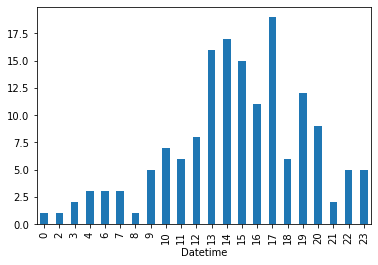

In [61]:
df_injury_sholiday.plot.bar()

In [62]:
df_injuryD = df_injury.Number.groupby(pd.Grouper(freq="1D")).count()
np.mean(df_injuryD)

10.952511415525114

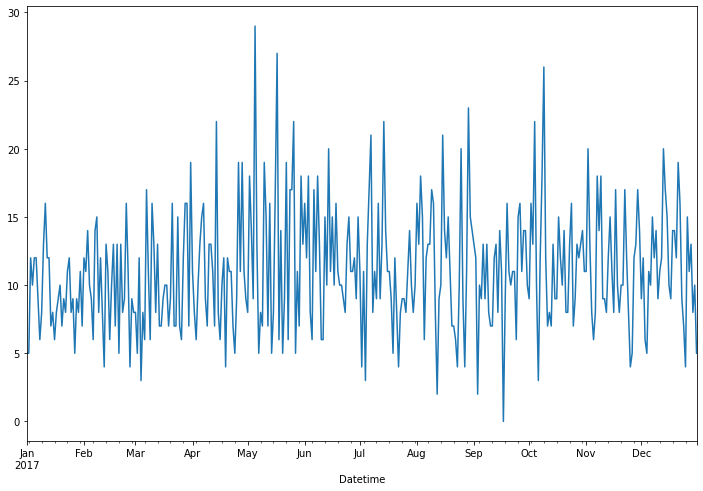

In [63]:
df_injuryD.loc['2017-01-01':'2017-12-31'].plot(figsize=(12,8));

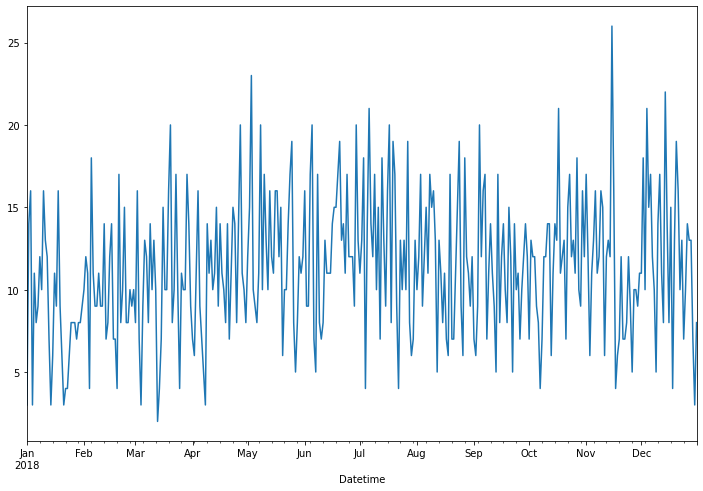

In [64]:
df_injuryD.loc['2018-01-01':'2018-12-31'].plot(figsize=(12,8));

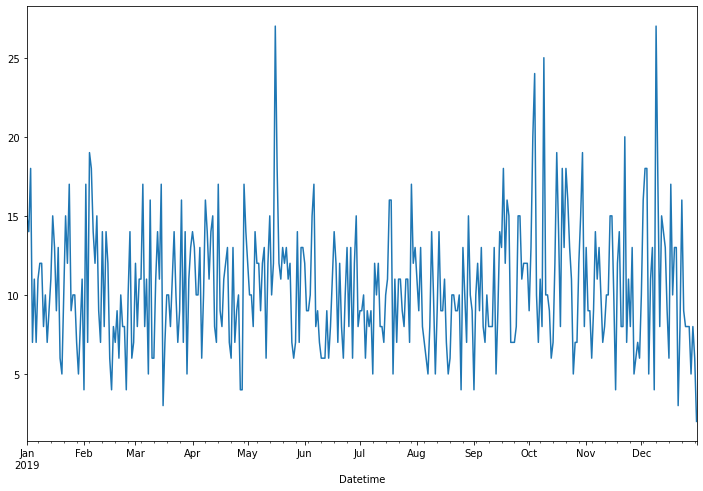

In [65]:
df_injuryD.loc['2019-01-01':'2019-12-31'].plot(figsize=(12,8));

In [66]:
df_injuryD.ratio=df_injuryD/df_day
df_injuryD.ratio.head(10)

Datetime
2017-01-01    0.294118
2017-01-02    0.250000
2017-01-03    0.184615
2017-01-04    0.277778
2017-01-05    0.333333
2017-01-06    0.333333
2017-01-07    0.120000
2017-01-08    0.214286
2017-01-09    0.135593
2017-01-10    0.206349
Freq: D, Name: Number, dtype: float64

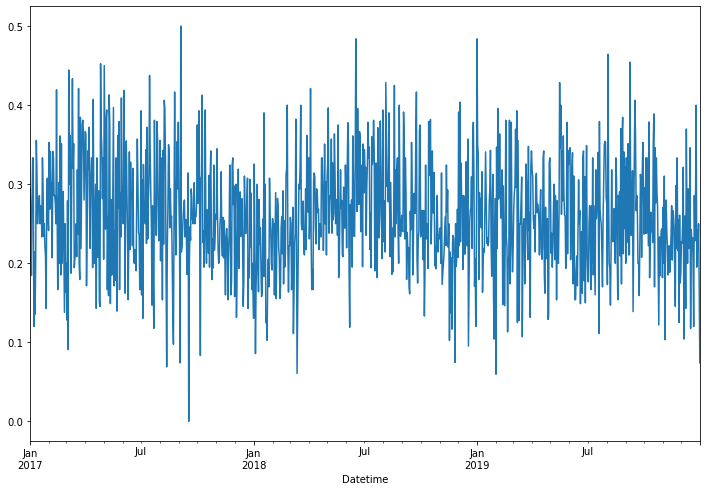

In [67]:
# Ratio of injury or death causing accidents/all accidents
df_injuryD.ratio.plot(figsize=(12,8));

In [68]:
df_injuryD.ratio[df_injuryD.ratio>0.48]

Datetime
2017-09-04    0.500000
2018-06-17    0.483871
2019-01-01    0.483871
Name: Number, dtype: float64

In [69]:
df1.Intersection.value_counts()

B    35658
I    10850
R       28
Name: Intersection, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Intersection')

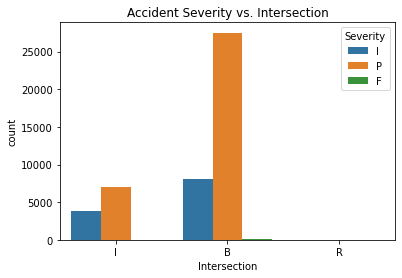

In [70]:
# Intersection is easy to cause injury
ax = sns.countplot(x="Intersection", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Intersection')

In [71]:
df1.Alcohol.value_counts()

N    44944
Y     1592
Name: Alcohol, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Alcohol')

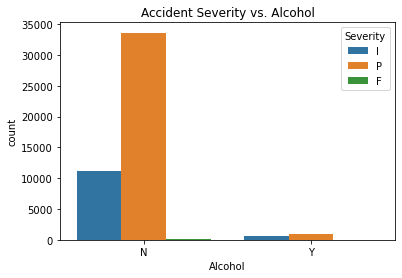

In [72]:
ax = sns.countplot(x="Alcohol", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Alcohol')

In [73]:
df1.Severity[df1.Alcohol=='Y'].value_counts()

P    934
I    640
F     18
Name: Severity, dtype: int64

In [74]:
# 1 means same direction (rear end), 4 means opposite direction (head on), could be the worst situation.
df1['Crash Type'].value_counts()

1.0     17327
2.0      7011
3.0      6391
11.0     5445
6.0      3808
8.0      1593
12.0     1128
7.0       712
4.0       670
13.0      638
15.0      595
5.0       418
14.0      290
10.0      211
99.0      191
9.0        88
0.0         2
16.0        1
Name: Crash Type, dtype: int64

In [75]:
# About half of such type collisions casued death or injury
df1.Severity[df1['Crash Type']==4].value_counts()

P    340
I    321
F      9
Name: Severity, dtype: int64

In [76]:
# Type 13 is the worst! Accidents involving pedestrains.
df1.Severity[df1['Crash Type']==13].value_counts()

I    499
P     90
F     49
Name: Severity, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Crash Type')

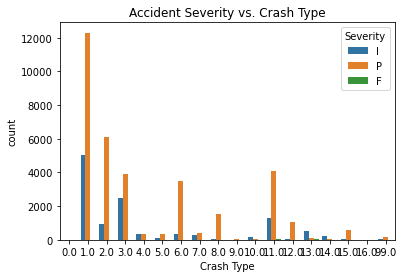

In [77]:
ax = sns.countplot(x="Crash Type", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Crash Type')

In [78]:
# There are more accidents involving only one vehicle than I expected.
df1['Total Vehicles'].value_counts()

2.0    34887
1.0     7906
3.0     3113
4.0      509
5.0       88
6.0       22
7.0        9
8.0        2
Name: Total Vehicles, dtype: int64

In [79]:
# Route 30, 295 and 130 are major roads in Camden County
df1.Route.value_counts().head(10)

30.0     3210
295.0    3051
130.0    2515
70.0     2023
76.0     1700
561.0    1682
42.0     1608
38.0     1445
168.0    1308
73.0     1094
Name: Route, dtype: int64

In [80]:
df1['Road Horizontal Alignment'].value_counts()

1.0    42025
3.0     2613
2.0     1644
0.0       63
Name: Road Horizontal Alignment, dtype: int64

In [81]:
df1['Road Grade'].value_counts()

4.0    41753
5.0     2358
6.0     1853
7.0      186
0.0       84
8.0       50
Name: Road Grade, dtype: int64

In [82]:
df1['Road Surface Type'].value_counts()

2.0     43398
1.0      2838
3.0        82
5.0        35
0.0        18
99.0       18
4.0        13
Name: Road Surface Type, dtype: int64

In [83]:
df1['Surface Condition'].value_counts()

1.0     36301
2.0      8577
3.0       824
4.0       339
5.0       133
0.0       124
6.0        24
9.0        19
99.0        7
8.0         5
7.0         1
Name: Surface Condition, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Surface Condition')

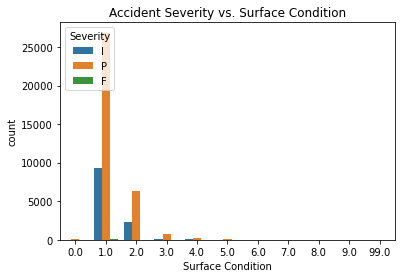

In [84]:
ax = sns.countplot(x="Surface Condition", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Surface Condition')

In [85]:
df1['Light Condition'].value_counts()

1.0    32816
6.0     7313
7.0     2456
3.0     1304
5.0     1232
2.0      689
4.0      303
0.0      294
Name: Light Condition, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Light Condition')

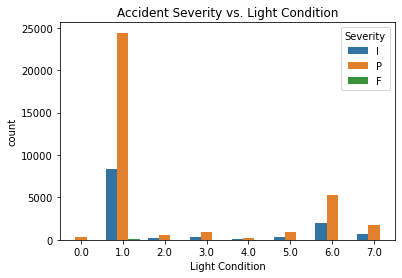

In [86]:
ax = sns.countplot(x="Light Condition", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Light Condition')

In [87]:
# 4 means dark and no street light, it does not not cause more severe accidents.
df1.Severity[df1['Light Condition']==4].value_counts()

P    233
I     68
F      2
Name: Severity, dtype: int64

In [88]:
df1['Environment Condition'].value_counts()

1.0     36912
2.0      6075
5.0      1985
3.0       976
0.0       136
7.0        73
4.0        72
6.0        68
8.0        34
10.0       11
99.0        5
Name: Environment Condition, dtype: int64

In [89]:
# Snow does not cause more severe accidents
df1.Severity[df1['Environment Condition']==3].value_counts()

P    809
I    167
Name: Severity, dtype: int64

In [90]:
df1.Severity[df1['Environment Condition']==7].value_counts()

P    60
I    13
Name: Severity, dtype: int64

In [91]:
df1['Road Divided By'].value_counts()

5.0     24584
1.0     11068
4.0      4635
3.0      2747
2.0      2083
0.0       114
99.0       46
Name: Road Divided By, dtype: int64

In [92]:
Speed=[25, 45, 55, 40, 35, 50, 65, 30]
df1s=df1[df1['Posted Speed'].isin(Speed)]

Text(0.5, 1.0, 'Accident Severity vs. Posted Speed')

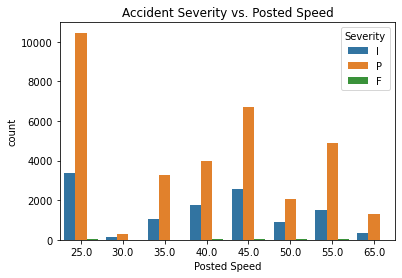

In [93]:
ax = sns.countplot(x="Posted Speed", hue="Severity", data=df1s)
ax.set_title('Accident Severity vs. Posted Speed')

In [94]:
df1.Severity[df1['Posted Speed']==25].value_counts()

P    10452
I     3368
F       35
Name: Severity, dtype: int64

In [95]:
df1['Total Vehicles'].value_counts()

2.0    34887
1.0     7906
3.0     3113
4.0      509
5.0       88
6.0       22
7.0        9
8.0        2
Name: Total Vehicles, dtype: int64

Text(0.5, 1.0, 'Accident Severity vs. Car Numbers')

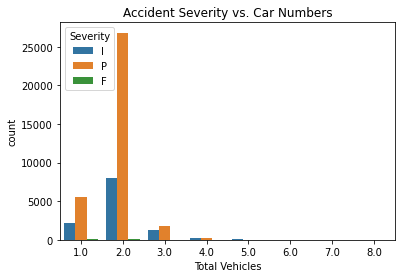

In [96]:
ax = sns.countplot(x="Total Vehicles", hue="Severity", data=df1)
ax.set_title('Accident Severity vs. Car Numbers')

In [97]:
df1.shape

(46536, 24)

In [98]:
df1.drop(columns=['P Killed', 'P injured','Alcohol','Other Property Damage','Killed', 'Injured'], inplace=True)

In [99]:
df1=df1.astype({'Crash Type':'category', 'Total Vehicles':'category','Route':'category','Road Horizontal Alignment':'category', 'Road Grade':'category', 'Road Surface Type':'category',
       'Surface Condition':'category', 'Light Condition':'category', 'Environment Condition':'category','Road Divided By':'category'})

In [100]:
df1.isnull().sum()

Number                          0
Municipality                    0
Date                            0
Day of Week                     0
Severity                        0
Intersection                    0
Crash Type                     17
Total Vehicles                  0
Location                        0
Route                        9445
Road Horizontal Alignment     191
Road Grade                    252
Road Surface Type             134
Surface Condition             182
Light Condition               129
Environment Condition         189
Road Divided By              1259
Posted Speed                 1105
dtype: int64

In [101]:
df2=df1.dropna(subset=['Crash Type', 'Road Horizontal Alignment', 'Road Grade', 'Road Surface Type','Surface Condition',
                      'Light Condition','Environment Condition', 'Road Divided By', 'Posted Speed'])

In [102]:
df2.drop(columns=['Route', 'Number'], inplace=True)

C:\Users\nshan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [103]:
df2.loc[df2.groupby('Location').Location.transform('count').lt(100), 'Location'] = 'Other'
df2.shape

C:\Users\nshan\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(43934, 16)

In [110]:
df2.Location.value_counts().head(10)

Other                                                 10560
US 30                                                  3122
I-295                                                  3033
US 130                                                 2435
NJ 70                                                  1984
I-76                                                   1688
NJ 42                                                  1606
ROUTE 561                                              1551
NJ 38                                                  1383
NJ 168                                                 1278
Name: Location, dtype: int64

In [104]:
df2.isnull().sum()

Municipality                 0
Date                         0
Day of Week                  0
Severity                     0
Intersection                 0
Crash Type                   0
Total Vehicles               0
Location                     0
Road Horizontal Alignment    0
Road Grade                   0
Road Surface Type            0
Surface Condition            0
Light Condition              0
Environment Condition        0
Road Divided By              0
Posted Speed                 0
dtype: int64

In [105]:
df2.phik_matrix()

C:\Users\nshan\anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable Date is very large: 1095. Are you sure this is not an interval variable? Analysis for pairs of variables including Date might be slow.
  warnings.warn(


interval columns not set, guessing: ['Posted Speed']


,Municipality,Date,Day of Week,Severity,Intersection,Crash Type,Total Vehicles,Location,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed
Municipality,1.000000,0.256580,0.093453,0.215777,0.325499,0.377668,0.186837,0.897045,0.213756,0.161184,0.267361,0.075800,0.251364,0.114550,0.612108,0.672338
Date,0.256580,1.000000,1.000000,0.082338,0.079893,0.317223,0.186108,0.300389,0.121144,0.127958,0.080417,0.788980,0.327894,0.801756,0.155529,0.187780
Day of Week,0.093453,1.000000,1.000000,0.014742,0.000000,0.111962,0.097930,0.101058,0.039355,0.005873,0.014640,0.095230,0.142698,0.104742,0.017272,0.037590
Severity,0.215777,0.082338,0.014742,1.000000,0.260510,0.473820,0.162763,0.186682,0.015661,0.025453,0.018716,0.052989,0.060165,0.045476,0.054108,0.094488
Intersection,0.325499,0.079893,0.000000,0.260510,1.000000,0.645726,0.089076,0.411854,0.050610,0.109497,0.051103,0.032763,0.087520,0.024056,0.237325,0.287716
Crash Type,0.377668,0.317223,0.111962,0.473820,0.645726,1.000000,0.680350,0.570763,0.246604,0.128360,0.104603,0.213360,0.294519,0.174421,0.359539,0.447485
Total Vehicles,0.186837,0.186108,0.097930,0.162763,0.089076,0.680350,1.000000,0.199381,0.192816,0.056922,0.012750,0.106601,0.225359,0.089334,0.060231,0.092374
Location,0.897045,0.300389,0.101058,0.186682,0.411854,0.570763,0.199381,1.000000,0.275169,0.229798,0.287625,0.138567,0.280068,0.168534,0.806730,0.867832
Road Horizontal Alignment,0.213756,0.121144,0.039355,0.015661,0.050610,0.246604,0.192816,0.275169,1.000000,0.367633,0.397951,0.157661,0.094348,0.141478,0.206929,0.115580
Road Grade,0.161184,0.127958,0.005873,0.025453,0.109497,0.128360,0.056922,0.229798,0.367633,1.000000,0.297893,0.135630,0.036112,0.103297,0.115022,0.067266


interval columns not set, guessing: ['Posted Speed']


C:\Users\nshan\anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable Date is very large: 1095. Are you sure this is not an interval variable? Analysis for pairs of variables including Date might be slow.
  warnings.warn(


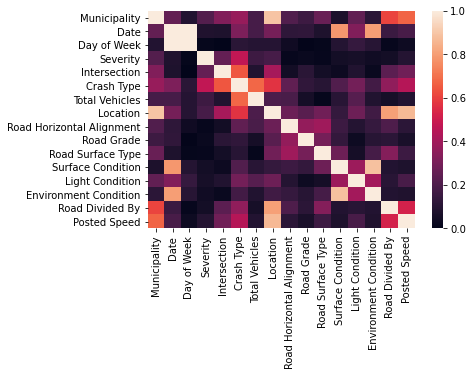

In [106]:
sns.heatmap(df2.phik_matrix())

interval columns not set, guessing: ['Posted Speed']


C:\Users\nshan\anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable Date is very large: 1095. Are you sure this is not an interval variable? Analysis for pairs of variables including Date might be slow.
  warnings.warn(


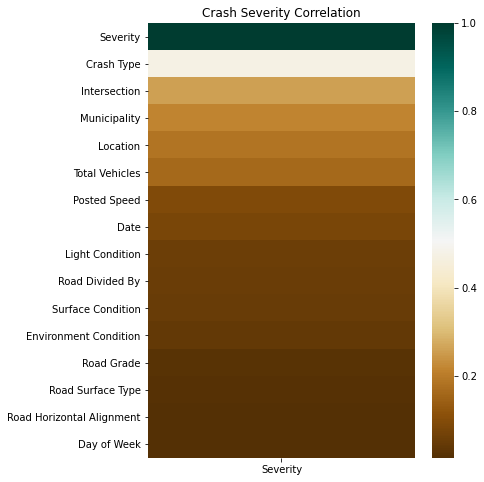

In [107]:
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(df2.phik_matrix()[['Severity']].sort_values(by='Severity', ascending=False),cmap='BrBG')
heatmap.set_title('Crash Severity Correlation');

In [108]:
df2.to_csv('Camden_accidents/Camden_accidents2.csv')